In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ds_gen import gen

In [ ]:
c = np.array(['red', 'blue'])


In [3]:
ds, gs = gen([(0, 1), (6, 6)],
			 [1, 2],
			 [5, 10], shuffle_flag=True)
ds.shape

(15, 2)

In [4]:
gs

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1])

In [5]:
dataset = {}

t_ds, t_gt = gen([(0, 1), (6, 6)],
				 [1, 2],
				 [5, 10], shuffle_flag=True)
dataset['train_samples'] = t_ds
dataset['train_labels'] = t_gt

t_ds, t_gt = gen([(0, 1), (6, 6)],
				 [1, 2],
				 [5, 10], shuffle_flag=True)
dataset['test_samples'] = t_ds
dataset['test_labels'] = t_gt

t_ds, t_gt = gen([(0, 1), (6, 6)],
				 [1, 2],
				 [10, 20], shuffle_flag=True)
dataset['available_pool_samples'] = t_ds
dataset['available_pool_labels'] = t_gt

In [6]:
from ActiveLearning import ActiveLearningPipeline

In [7]:
threshold = 2

In [8]:
al = ActiveLearningPipeline(dataset, 
                            "LogisticRegression", 
                            "entropy_e",
							"pagerank",
                            weighted_selection=False, 
                            iterations=10, 
                            budget_per_iter=2, 
                            graph_building_function="euclidean", 
                            graph_threshold=threshold)

entropy_e
pagerank


In [9]:
trained_model = al._train_model()
trained_model

LogisticRegression()

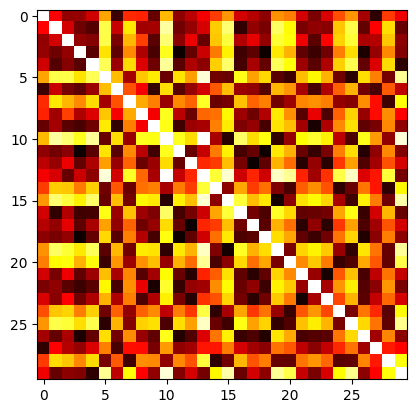

In [10]:
A = al.selection_criterion.graph_builder.similarity(al.available_pool_samples)
plt.imshow(A, cmap='hot')
plt.show()

In [11]:
E = np.vstack(np.where(A < threshold))
# E

In [12]:
nx_graph = nx.Graph()
nx_graph.add_nodes_from(range(len(al.available_pool_samples)))
nx_graph.add_edges_from(zip(*E))


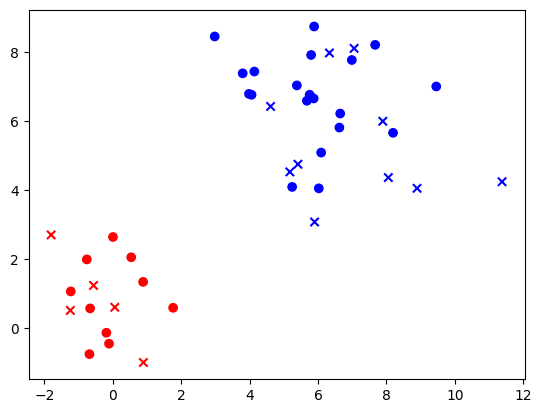

In [32]:
plt.scatter(al.available_pool_samples[:, 0], al.available_pool_samples[:, 1], c=c[al.available_pool_labels])
plt.scatter(al.train_samples[:, 0], al.train_samples[:, 1], c=c[al.train_labels], marker='x')

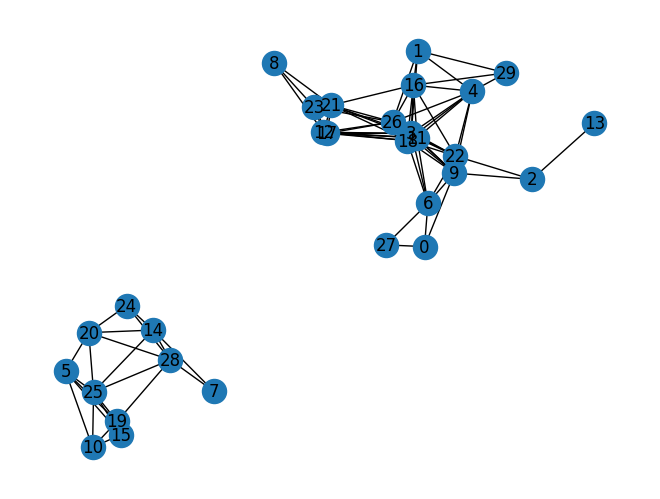

In [14]:
# pos = nx.spring_layout(nx_graph, k=.9, iterations=50)
pos = dict(zip(range(len(al.available_pool_samples)), al.available_pool_samples))
nx.draw(nx_graph, pos=pos, with_labels=True)


In [15]:
py_data, G = al.selection_criterion.graph_builder(al.available_pool_samples)
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29))

In [ ]:
uncertainty_scores = al.selection_criterion._calc_uncertainties(al.available_pool_samples,
										   labeled=None,
										   model=al.selection_criterion.model,
										   G=G)

weights = np.random.beta(1, [1. / 1, 1. / 1, 1], size=(3))
weights = weights / weights.sum()

final_scores = al.selection_criterion.sum_dicts(uncertainty_scores, coef=weights)

In [27]:
# final_scores

In [25]:
max_v = max(final_scores.values())
for k, v in final_scores.items():
	final_scores[k] = v / max_v

In [26]:
final_scores

{0: 0.4256989984545505,
 1: 0.42636167819816195,
 2: 0.39258412938740406,
 3: 0.9027272354345014,
 4: 0.6885113279632712,
 5: 0.6563596169638762,
 6: 0.6627422661231214,
 7: 0.6282786139780261,
 8: 0.38990777564531004,
 9: 0.7654733006959973,
 10: 0.5280136562931108,
 11: 0.8311273151712302,
 12: 0.7196180353265691,
 13: 0.19369861448171324,
 14: 0.9127489598966987,
 15: 0.5596119967340507,
 16: 0.6938704780132581,
 17: 0.6360910678965319,
 18: 0.8372283197099305,
 19: 0.6709648812353884,
 20: 0.7374519374322318,
 21: 0.7498866289978287,
 22: 0.7321888842293562,
 23: 0.5154346317762668,
 24: 0.6643629148462447,
 25: 0.8792345274596968,
 26: 0.9053770774320595,
 27: 0.3998099445024789,
 28: 1.0,
 29: 0.2857684303345701}

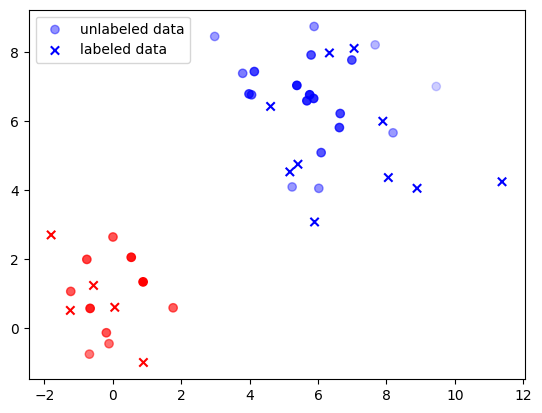

In [37]:
plt.scatter(al.available_pool_samples[:, 0], al.available_pool_samples[:, 1], c=c[al.available_pool_labels], alpha=list(final_scores.values()), label='unlabeled data')
plt.scatter(al.train_samples[:, 0], al.train_samples[:, 1], c=c[al.train_labels], marker='x', label='labeled data')

plt.legend()
plt.show()


In [ ]:
plt.scatter()

In [104]:
import torch

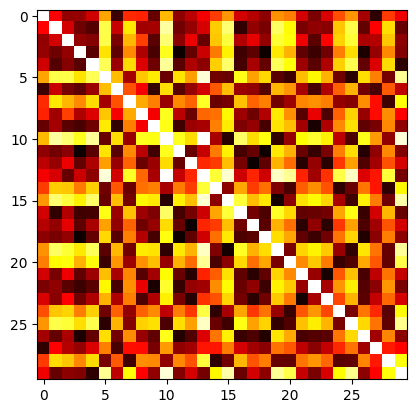

In [23]:
affine_matrix = al.selection_criterion.graph_builder.similarity(al.available_pool_samples)
plt.imshow(affine_matrix, cmap='hot')

In [24]:
E = np.vstack(np.where(affine_matrix < al.selection_criterion.graph_builder.threshold))
E.shape

(2, 184)

In [120]:
range(len(al.available_pool_samples))

range(0, 30)

In [121]:

nx_graph = nx.Graph()
nx_graph.nodes

NodeView(())

In [122]:
nx_graph.add_nodes_from(range(len(al.available_pool_samples)))
nx_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29))

In [118]:
# list(zip(*E))

In [123]:
nx_graph.add_edges_from(zip(*E))
nx_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29))

In [124]:
nx_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29))

In [ ]:


res = al.run_pipeline()

print(res)

entropy_e


100%|██████████| 10/10 [00:00<00:00, 72.87it/s, Accuracy=1]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
